In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
files = [f for f in os.listdir(r'C:\Users\33646\Downloads\Projet_ANALYSE_DES_VENTES\DATASET')]
for fichier in files:
    print(fichier)

April.csv
August.csv
December.csv
February.csv
January.csv
July.csv
June.csv
March.csv
May.csv
November.csv
October.csv
September.csv


In [3]:
# chemin d'accès to the file
path = r'C:\Users\33646\Downloads\Projet_ANALYSE_DES_VENTES\DATASET'
# Définir la dataframe
All_Sales_Data = pd.DataFrame()

for fichier in files:
    csv_file = pd.read_csv(path + '/' + fichier)
    All_Sales_Data = pd.concat([All_Sales_Data, csv_file], ignore_index=True)

In [4]:
All_Sales_Data.to_csv(path + '/All_Sales_Data.csv', index=False)

In [83]:
All_Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170796 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          170796 non-null  object        
 1   Product           170796 non-null  object        
 2   Quantity Ordered  170796 non-null  int32         
 3   Price Each        170796 non-null  float64       
 4   Order Date        170796 non-null  datetime64[ns]
 5   Address           170796 non-null  object        
 6   Month             170796 non-null  int32         
 7   Revenu            170796 non-null  float64       
 8   City              170796 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 11.7+ MB


In [79]:
All_Sales_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Address,Month,Revenu,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [50]:
All_Sales_Data =  All_Sales_Data.dropna()

In [51]:
All_Sales_Data.drop_duplicates

<bound method DataFrame.drop_duplicates of        Order ID                     Product  Quantity Ordered  Price Each  \
0        176558        USB-C Charging Cable                 2       11.95   
2        176559  Bose SoundSport Headphones                 1       99.99   
3        176560                Google Phone                 1      600.00   
4        176560            Wired Headphones                 1       11.99   
5        176561            Wired Headphones                 1       11.99   
...         ...                         ...               ...         ...   
186845   259353      AAA Batteries (4-pack)                 3        2.99   
186846   259354                      iPhone                 1      700.00   
186847   259355                      iPhone                 1      700.00   
186848   259356      34in Ultrawide Monitor                 1      379.99   
186849   259357        USB-C Charging Cable                 1       11.95   

            Order Date          

In [44]:
def month(x):
    return str(x).split('/')[0]
All_Sales_Data['Month'] = All_Sales_Data['Order Date'].apply(month)
# Remove rows where 'Quantity Ordered' is not numeric
All_Sales_Data = All_Sales_Data[All_Sales_Data['Month'].str.isnumeric()]

# Convert 'Quantity Ordered' to integer
All_Sales_Data['Month'] = All_Sales_Data['Month'].astype(int)
All_Sales_Data['Month'].unique()

array([ 4,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

In [46]:
All_Sales_Data['Month'] = All_Sales_Data['Month'].astype(int)

In [48]:
# Remove rows where 'Price Each' is not numeric
All_Sales_Data = All_Sales_Data[pd.to_numeric(All_Sales_Data['Price Each'], errors='coerce').notnull()]

# Convert 'Price Each' to float
All_Sales_Data['Price Each'] = All_Sales_Data['Price Each'].astype(float)

In [42]:
All_Sales_Data['Price Each'] = All_Sales_Data['Price Each'].astype(float)

In [57]:
All_Sales_Data['Order Date'] = pd.to_datetime(All_Sales_Data['Order Date'])

In [54]:
# Convert 'Quantity Ordered' to integer
All_Sales_Data['Quantity Ordered'] = All_Sales_Data['Quantity Ordered'].astype(int)


In [89]:
All_Sales_Data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Address                     object
Month                        int32
Revenu                     float64
City                        object
dtype: object

In [88]:
All_Sales_Data.shape

(170796, 9)

In [65]:
All_Sales_Data.rename(columns={'Purchase Address': 'Address'}, inplace=True)


In [72]:
All_Sales_Data['Revenu'] = All_Sales_Data['Quantity Ordered'] * All_Sales_Data['Price Each']

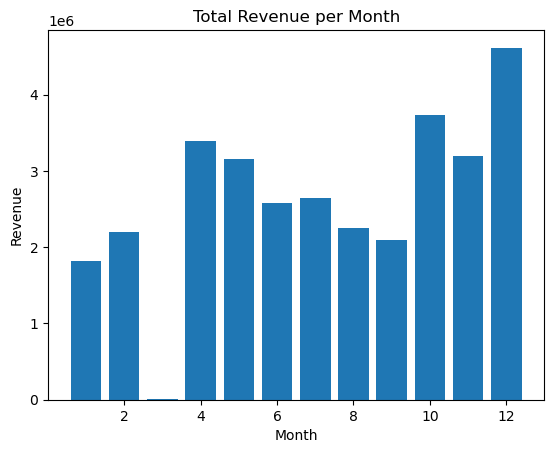

In [77]:
months = range(1, 13)
total_revenue_per_month = All_Sales_Data.groupby('Month')['Revenu'].sum()

plt.bar(months, total_revenue_per_month)
plt.xlabel('Month')
plt.ylabel('Revenu')
plt.title("Total Revenue per Month")
plt.show()

### Top Cities

In [82]:
All_Sales_Data['City'] = All_Sales_Data['Address'].apply(lambda x: x.split(',')[1].strip())

In [85]:
All_Sales_Data['City'].astype(str)

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
186845      Los Angeles
186846    San Francisco
186847    San Francisco
186848    San Francisco
186849    San Francisco
Name: City, Length: 170796, dtype: object

Revenu_per_city = All_Sales_Data.groupby('City')['Revenu'].sum()
print(Revenu_per_city)

''

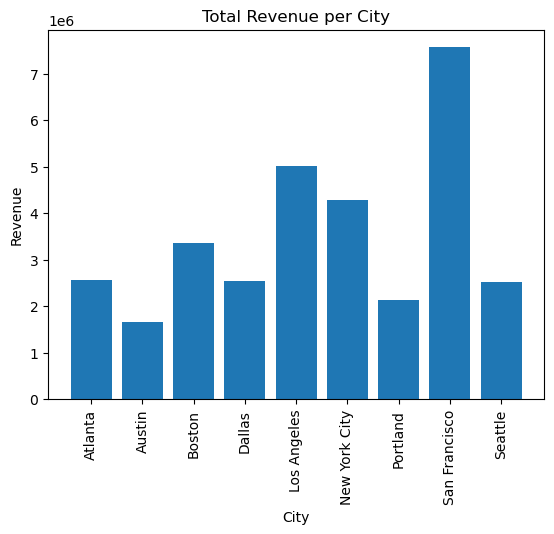

In [111]:
revenue_per_city = All_Sales_Data.groupby('City')['Revenu'].sum()

# Plotting the bar chart
plt.bar(revenue_per_city.index, revenue_per_city)
plt.xlabel('City')
plt.ylabel('Revenue')
plt.title("Total Revenue per City")
plt.xticks(rotation=90)  # Rotate city names
;

### Optimal Ad Hour

Text(0, 0.5, 'nombre des commandes')

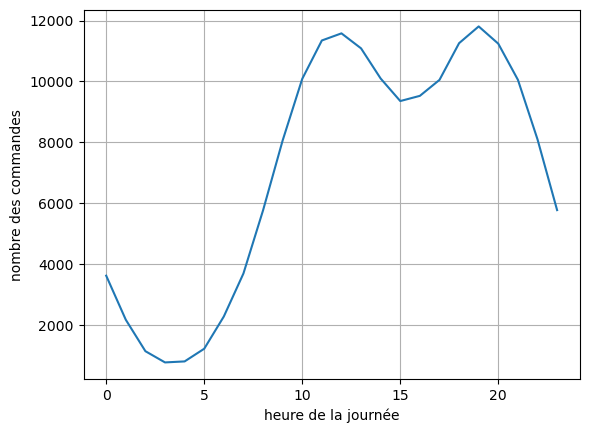

In [104]:
# Convert the 'Order Date' column to datetime and extract the hour
All_Sales_Data['Heure'] = pd.to_datetime(All_Sales_Data['Order Date']).dt.hour

# Initialize empty lists to store keys (hours) and corresponding counts
keys = []
hours = []

# Group the data by hour and count the number of orders for each hour
for key, hour_group in All_Sales_Data.groupby('Heure'):
    keys.append(key)
    hours.append(len(hour_group))

# Plotting the line chart
plt.grid()
plt.plot(keys, hours)
plt.xlabel('Heure de la journée')  # X-axis label: Hour of the day
plt.ylabel('Nombre des commandes')  # Y-axis label: Number of orders
plt.title('Nombre des commandes par heure de la journée')  # Plot title
plt.show()


### Le Meilleur Produit

<Axes: xlabel='Product'>

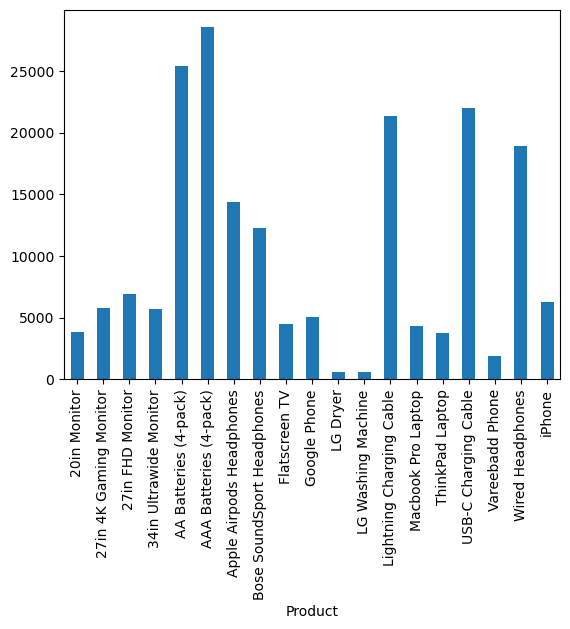

In [118]:
# Le Produit le plus vendu !
All_Sales_Data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')


<Axes: xlabel='Product'>

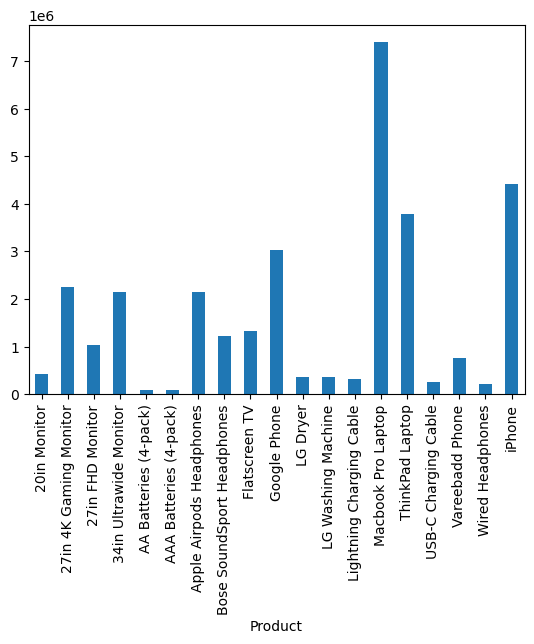

In [117]:
# Le Produit le plus valuable !
All_Sales_Data.groupby('Product')['Revenu'].sum().plot(kind='bar')
